#### Lecture 1. image classification 2

1. deeper convolutions
- larger receptive fileds & more capacity and non-linearity
- gradient vanishing / exploding
- computationally complex
- degradation problem(overfitting이 아님, layer수가 증가할수록 training error 증가)

2. GoogLeNet(2015)
- stacked Inception module : depth가 아닌 수평 확장
- 1x1 condvolution(bottle neck layer)을 통해 channel dimension 축소
- auxiliary classifiers : vanishing gradient 해소를 위해 층 중간중간에 loss를 구해 back propagation을 가능하게 하는 층을 넣음
    - 학습 도중에만 사용하고 test 시에는 사용하지 않음

3. ResNet(2016)
- 아직도 대다수 CNN model의 backbone으로 기능하는 network
- ultra deeper network (152 layer)
- identity 외의 잔여부분(residual function) 만 학습 하기
- short cut connection(skip connection)
- 모든 path의 가능성이 O(2<sup>n</sup>)으로 늘어나므로 복잡한 학습이 가능
- residual connection에 적합한 He initialization으로 입력이 너무 커지는 것 방지

4. 이 후의 모델들
- DenseNet : identity와 mapping을 더해주는 것이 아닌 concatenation
- SENet : channel 간의 attention 수행, channel 별로 attention score 가 있고 activation rescaling 수행
- EfficientNet
    - deep, wide, high resolution 각각이 다른 성능 curve를 그림
    - 이를 잘 compound 해서 network architecture 설계
- Deformable convolution : irregular convolution 수행
    - deformable shape이 receptive field 결정

5. CNN backbones
- VGGNet, ResNet : 단순한 구조, reliable한 성능

#### Lecture 2. Sementic Segmentation

1. sementic segmentation
- 이미지 분류를 픽셀 단위로 수행
- 같은 객체가 여러개 있으면 같은 category로 분류
- 무인 자동차 운전, 의료 영상 분석, computational photography

2. sementic segmentation model
- Fully convolutional networks
    - end-to-end(처음부터 끝까지 역전파 가능한 형태로, 입력과 출력만 주어지면 됨)
    - 모두 neural net network 이므로 GPU로 병렬 처리도 가능하여 빠름
    - 입력과 출력 모두 activation map(tensor), 공간정보가 포함됨
    - cf) fc-layer : 공간적인 정보를 고려하지 않고 fixed dimension vector 출력
    - flattening 시에 채널 축을 기준으로 stack하면 약간의 공간정보를 얻을 수는 있음
    - fc-layer를 1x1 convolution 으로 대체하여 어떠한 입력사이즈에도 대응이 가능한 fc-layer를 얻을 수 있음
    
- upsampling
    - stride, pooling에 의해 최종 score map은 input에 비해 저해상도
    - 일단 작게 만들어 feature 추출의 receptive field를 키워 성능을 높인후
    - upsampling 을 통해 해상도를 높임
    - 방법 1 : transposed convolution
        - forward/backward pass convolution 구현, 중첩 구간이 없도록 parameter 조정
    - 방법 2 : upsample and convolution
        - interpolation 적용(nearest-neighbor) 후 convolution
        - input 쪽 layer는 low-level / Fine / detail / local 특성이고 output 쪽은 반대임
        - 이 두 특성을 확보하기 위해 fusion 함, 중간 단계의 특성을 활용하는 것이 구분에 도움
- U-net : 영상과 비슷한 출력을 가지는 이미지가 필요하거나 중간 단계의 특징이 필요한 경우
    - upsample과 downsample이 빈번하게 활용됨
- DeepLab : Conditional Random Fields(CRFs) - rough 하게 나온 scoremap과 이미지의 경계선과 일치하도록 확산
    - dilated convolution(atrous convolution) : kernel element 사이에 공간을 두어 receptive field가 지수증가
    - depthwise convolution + pointwise convolution : 계산의 차원 감소
    

#### peer session

Q) 이진 분류 모델의 성능평가 기법으로 accuracy 대신 ROC Curve 의 AUC 라는 지표를 많이 이용한다.
머신러닝에서 사례를 들어서 이것이 지니는 의미를 설명해 주세요.

A) accuracy는 case의 분포를 고려하지 않는 지표이므로 만약 90%의 검진자가 음성이고 10%의 검진자가
양성일 경우 모든 검진자를 음성으로 진단하면 accuracy가 90% 가 나오는 맹점이 있다. 이것을 해결하기
위한 것이 ROC curve 로 ROC curve 의 x축은 False Positive Rate(FPR)으로 (False positive의 수) /  (전체 negative case의 수) 이며 y축은 True Positive Rate(TPR)으로 (True positive의 수) / (전체 positive case의 수) 이다. FPR과 TPR의 값은 분류 모델에서 threshold값에 의해 결정되는데 만약 어떤 검진자가 양성일 확률지표가 threshold 를 넘어서면 양성이라고 판단하고 threshold를 넘어서지 않으면 음성이라고 하자. 만약 threshold를 1으로 정하면 TPR과 FPR은 0이 될 것이고, 0으로 정하면 TPR과 FPR은 1이 될 것이다. ROC curve를 그리면 무조건 우상향 하는 그래프가 그려진다. 최고의 분류모델은 어떤 하나의 Threshold를 기준으로 그 이상의 확률 예측을 지니는 case는 모두 positive, 그 이하는 모두 negative인 모델일 것이며 이때의 ROC 그래프는 직각형태가 되며 AUC(area under curve)는 1에 수렴한다. 무의미한 분류모델은 positive / negative case의 확률 분포가 서로 뒤섞인 케이스이며 이때 ROC 곡선은 y=x 에 수렴하여 AUC도 0.5에 근접한다.

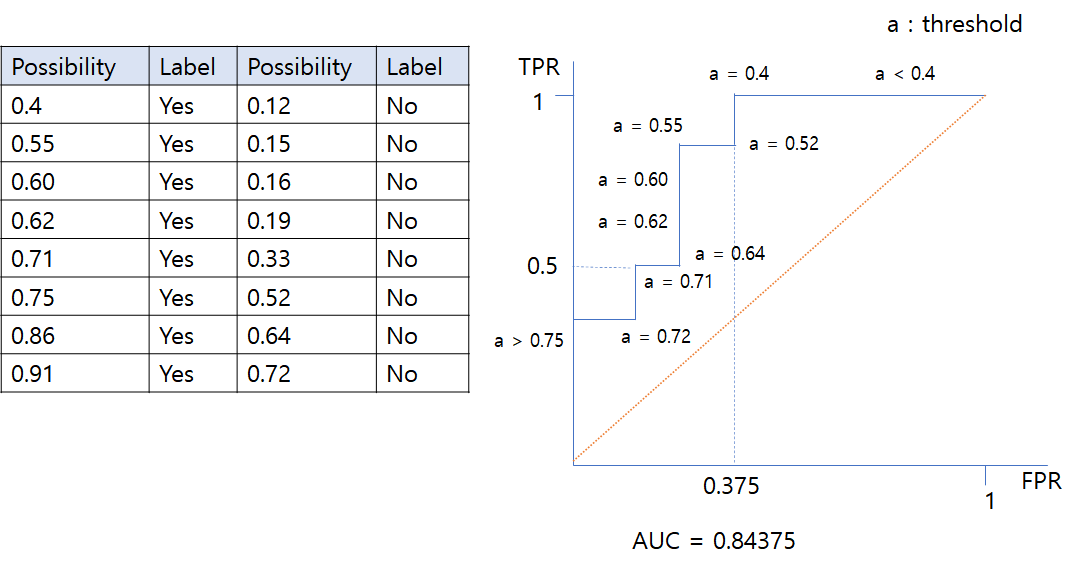